# Movie Ratings Analysis: Investigating Online Review Bias

## Project Overview
This data analysis project investigates potential bias in online movie ratings, specifically focusing on Fandango's rating system. The analysis compares movie ratings across multiple platforms including Fandango, Rotten Tomatoes, Metacritic, and IMDB to identify any systematic differences in rating patterns.

## Key Questions Addressed
- Do online movie review platforms show rating bias?
- How do Fandango's displayed ratings compare to actual user ratings?
- Is there a significant difference between critic and user ratings across platforms?
- How are poorly-rated movies scored across different platforms?

## Analysis Objectives
1. Evaluate potential bias in Fandango's rating system
2. Compare rating distributions across multiple platforms
3. Analyze the relationship between movie popularity and ratings
4. Investigate how poorly-rated movies are scored across platforms

## Data Sources
The analysis uses two primary datasets from FiveThirtyEight's GitHub repository:
1. `fandango_scrape.csv`: Contains movie ratings data from Fandango
2. `all_sites_scores.csv`: Includes aggregate ratings from multiple platforms

## References
- Original FiveThirtyEight Article: [Be Suspicious Of Online Movie Ratings, Especially Fandango's](http://fivethirtyeight.com/features/fandango-movies-ratings/)
- Data Source: [FiveThirtyEight GitHub Repository](https://github.com/fivethirtyeight/data)

## Environment Setup
Importing required libraries for data manipulation, analysis, and visualization.

In [1]:
# Core data manipulation and analysis libraries
import numpy as np
import pandas as pd

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

## Data Loading and Initial Exploration
Loading the two primary datasets:
1. `fandango_scrape.csv`: Fandango's movie ratings and displayed stars
2. `all_sites_scores.csv`: Aggregate ratings from multiple platforms

In [3]:
# Load Fandango ratings data
fandango = pd.read_csv("fandango_scrape.csv")

# Display basic information about the dataset
print("Fandango Dataset Overview:")
print("-" * 50)
print("\nFirst few rows:")
display(fandango.head())
print("\nDataset Info:")
display(fandango.info())
print("\nDescriptive Statistics:")
display(fandango.describe())

Fandango Dataset Overview:
--------------------------------------------------

First few rows:


,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    504 non-null    object 
 1   STARS   504 non-null    float64
 2   RATING  504 non-null    float64
 3   VOTES   504 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 15.9+ KB


None


Descriptive Statistics:


,STARS,RATING,VOTES
count,504.000000,504.000000,504.000000
mean,3.558532,3.375794,1147.863095
std,1.563133,1.491223,3830.583136
min,0.000000,0.000000,0.000000
25%,3.500000,3.100000,3.000000
50%,4.000000,3.800000,18.500000
75%,4.500000,4.300000,189.750000
max,5.000000,5.000000,34846.000000


In [4]:
df=fandango.copy()

## Rating Distribution Analysis
Investigating the relationship between movie popularity (votes) and ratings on Fandango.
This helps us understand if there's any correlation between a movie's popularity and its rating.

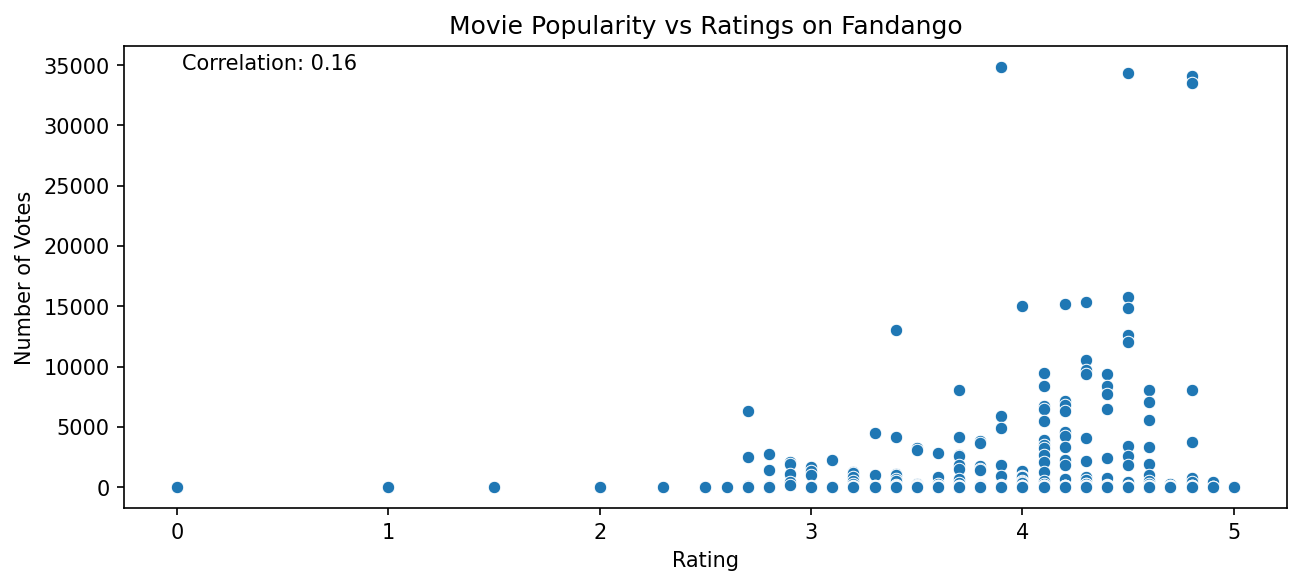


Correlation Matrix:


,STARS,RATING,VOTES
STARS,1.000000,0.994696,0.164218
RATING,0.994696,1.000000,0.163764
VOTES,0.164218,0.163764,1.000000


In [5]:
# Create figure for popularity vs rating scatter plot
plt.figure(figsize=(10,4),dpi=150)
sns.scatterplot(data=fandango, x='RATING', y='VOTES')
plt.title('Movie Popularity vs Ratings on Fandango')
plt.xlabel('Rating')
plt.ylabel('Number of Votes')

# Calculate and display correlation
correlation = fandango['RATING'].corr(fandango['VOTES'])
plt.annotate(f'Correlation: {correlation:.2f}', xy=(0.05, 0.95), xycoords='axes fraction')
plt.show()

# Display correlation matrix
print("\nCorrelation Matrix:")
display(fandango.corr(numeric_only=True))

## Temporal Analysis
Extracting and analyzing the year information from movie titles to understand rating patterns over time.

In [6]:
df.head(4)

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538



Movie Count (Yearly):


YEAR
1964      1
2012      1
2014     23
2015    478
2016      1
Name: count, dtype: int64

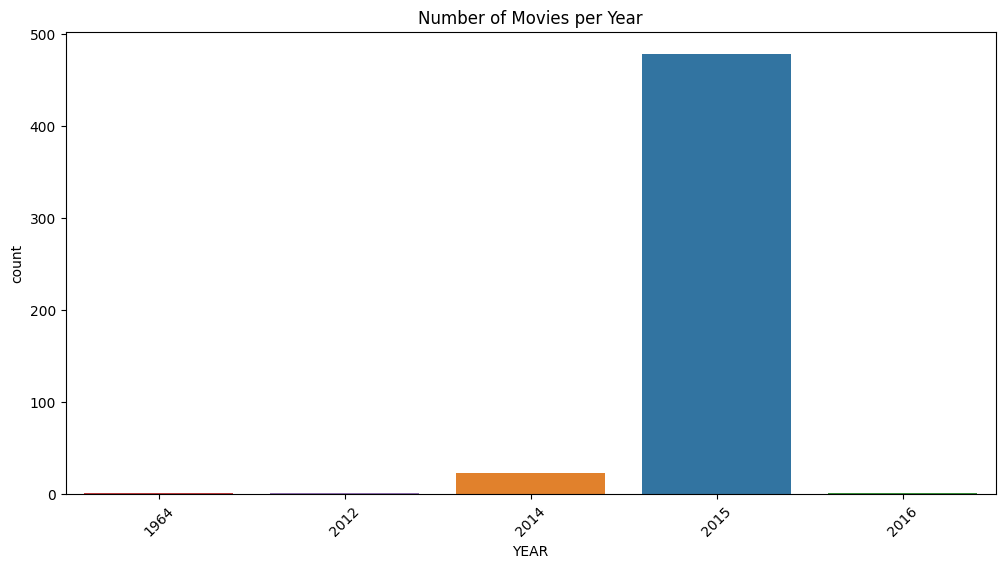


Top 10 Movies by Vote Count:


,FILM,VOTES,RATING,STARS
0,Fifty Shades of Grey (2015),34846,3.9,4.0
1,Jurassic World (2015),34390,4.5,4.5
2,American Sniper (2015),34085,4.8,5.0
3,Furious 7 (2015),33538,4.8,5.0
4,Inside Out (2015),15749,4.5,4.5
5,The Hobbit: The Battle of the Five Armies (2014),15337,4.3,4.5
6,Kingsman: The Secret Service (2015),15205,4.2,4.5
7,Minions (2015),14998,4.0,4.0
8,Avengers: Age of Ultron (2015),14846,4.5,5.0
9,Into the Woods (2014),13055,3.4,3.5


In [7]:
# Extract year from movie titles
fandango['YEAR'] = fandango['FILM'].apply(lambda title: title.split('(')[-1].replace(')', ''))
      
# Analyze movies per year
year_counts = fandango['YEAR'].value_counts().sort_index()
print(f'\nMovie Count (Yearly):')
display(year_counts)

# Visualize distribution of movies per year
plt.figure(figsize=(12, 6))
sns.countplot(data=fandango, x='YEAR', order=year_counts.index,hue='YEAR')
plt.title('Number of Movies per Year')
plt.xticks(rotation=45)
plt.show()

# Display top movies by vote count
print("\nTop 10 Movies by Vote Count:")
display(fandango.nlargest(10, 'VOTES')[['FILM', 'VOTES', 'RATING', 'STARS']])

## Rating Discrepancy Analysis
Investigating the difference between displayed ratings (STARS) and actual ratings on Fandango.
This analysis helps identify potential systematic inflation in displayed ratings.

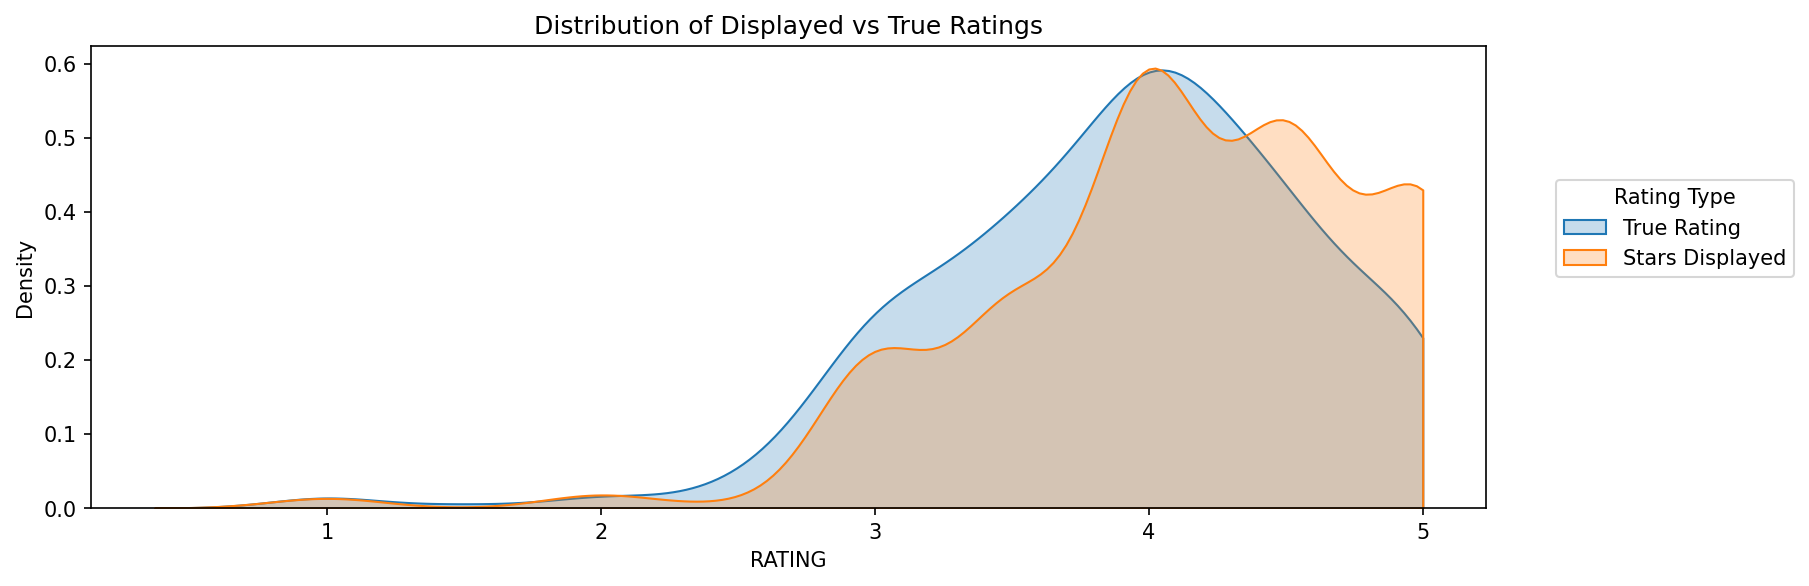

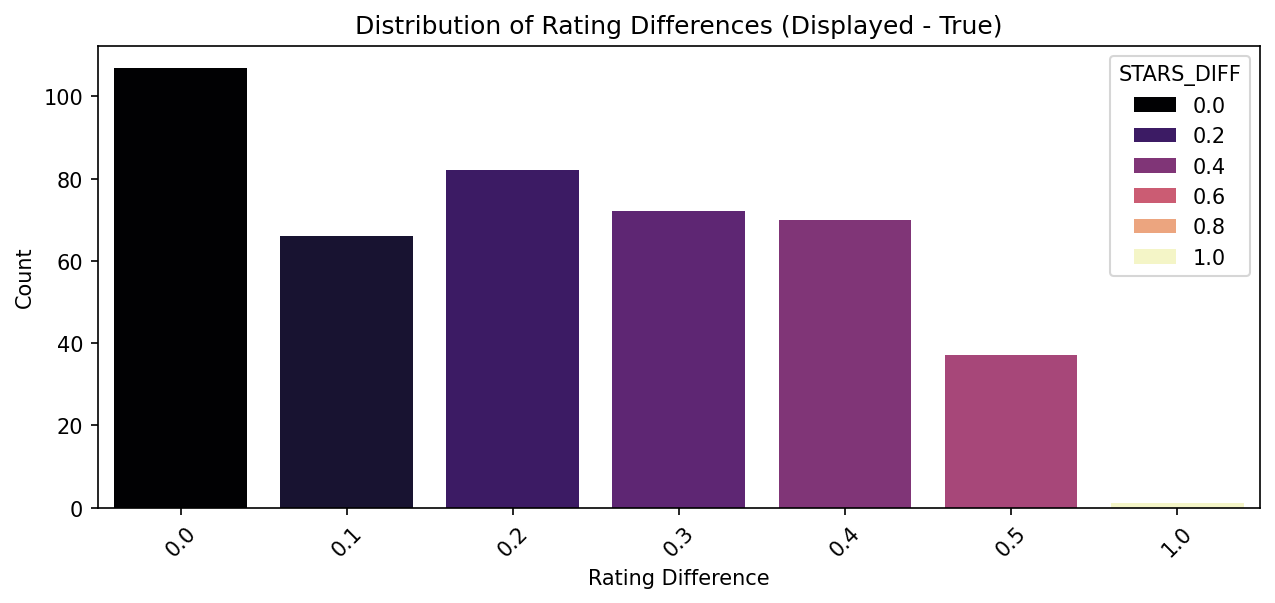


Movies with Largest Rating Inflation:


,FILM,STARS,RATING,STARS_DIFF
381,Turbo Kid (2015),5.0,4.0,1.0
8,Avengers: Age of Ultron (2015),5.0,4.5,0.5
11,Ant-Man (2015),5.0,4.5,0.5
50,Top Five (2014),4.0,3.5,0.5
70,Do You Believe? (2015),5.0,4.5,0.5
10,Cinderella (2015),5.0,4.5,0.5
85,Hot Tub Time Machine 2 (2015),3.5,3.0,0.5
89,Shaun the Sheep Movie (2015),4.5,4.0,0.5
94,Far From The Madding Crowd (2015),4.5,4.0,0.5
90,Love & Mercy (2015),4.5,4.0,0.5


In [8]:
# Remove movies with zero votes for accurate analysis
fan_reviewed = fandango[fandango['VOTES'] > 0].copy()

# Create visualization of rating distributions
plt.figure(figsize=(12,4),dpi=150)
sns.kdeplot(data=fan_reviewed, x='RATING', clip=[0,5], fill=True, label='True Rating')
sns.kdeplot(data=fan_reviewed, x='STARS', clip=[0,5], fill=True, label='Stars Displayed')

plt.title('Distribution of Displayed vs True Ratings')
plt.legend(loc=(1.05,0.5), title='Rating Type')
plt.show()

print('\n\n')

# Calculate rating differences
fan_reviewed["STARS_DIFF"] = (fan_reviewed['STARS'] - fan_reviewed['RATING']).round(2)

# Visualize rating differences
plt.figure(figsize=(10,4),dpi=150)
sns.countplot(data=fan_reviewed,x='STARS_DIFF',palette='magma',hue='STARS_DIFF')
plt.title('Distribution of Rating Differences (Displayed - True)')
plt.xlabel('Rating Difference')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Show movies with largest rating inflation
print("\nMovies with Largest Rating Inflation:")
display(fan_reviewed[fan_reviewed['STARS_DIFF'] >= 0.5].sort_values('STARS_DIFF', ascending=False)[['FILM', 'STARS', 'RATING', 'STARS_DIFF']])

## Cross-Platform Analysis
Comparing ratings across different platforms to identify systematic differences and potential biases.
We'll analyze:
- Rotten Tomatoes (Critics vs Users)
- Metacritic (Critics vs Users)
- IMDB user ratings

### Rotten Tomatoes Analysis
We'll examine the relationship between critic and user ratings in two ways:
1. **Directional Differences**: Shows whether critics tend to rate higher or lower than users
2. **Absolute Differences**: Shows the magnitude of disagreement regardless of direction

This dual analysis helps us understand both the bias (if any) and the typical magnitude of disagreement between critics and users.

In [9]:
# Load cross-platform data
all_sites = pd.read_csv("all_sites_scores.csv")

# Display basic information about the dataset
print("All_sites Dataset Overview:")
print("-" * 50)
print("\nFirst few rows:")
display(all_sites.head())
print("\nDataset Info:")
display(all_sites.info())
print("\nDescriptive Statistics:")
display(all_sites.describe())

All_sites Dataset Overview:
--------------------------------------------------

First few rows:


,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        146 non-null    object 
 1   RottenTomatoes              146 non-null    int64  
 2   RottenTomatoes_User         146 non-null    int64  
 3   Metacritic                  146 non-null    int64  
 4   Metacritic_User             146 non-null    float64
 5   IMDB                        146 non-null    float64
 6   Metacritic_user_vote_count  146 non-null    int64  
 7   IMDB_user_vote_count        146 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 9.3+ KB


None


Descriptive Statistics:


,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,60.849315,63.876712,58.808219,6.519178,6.736986,185.705479,42846.205479
std,30.168799,20.024430,19.517389,1.510712,0.958736,316.606515,67406.509171
min,5.000000,20.000000,13.000000,2.400000,4.000000,4.000000,243.000000
25%,31.250000,50.000000,43.500000,5.700000,6.300000,33.250000,5627.000000
50%,63.500000,66.500000,59.000000,6.850000,6.900000,72.500000,19103.000000
75%,89.000000,81.000000,75.000000,7.500000,7.400000,168.500000,45185.750000
max,100.000000,94.000000,94.000000,9.600000,8.600000,2375.000000,334164.000000


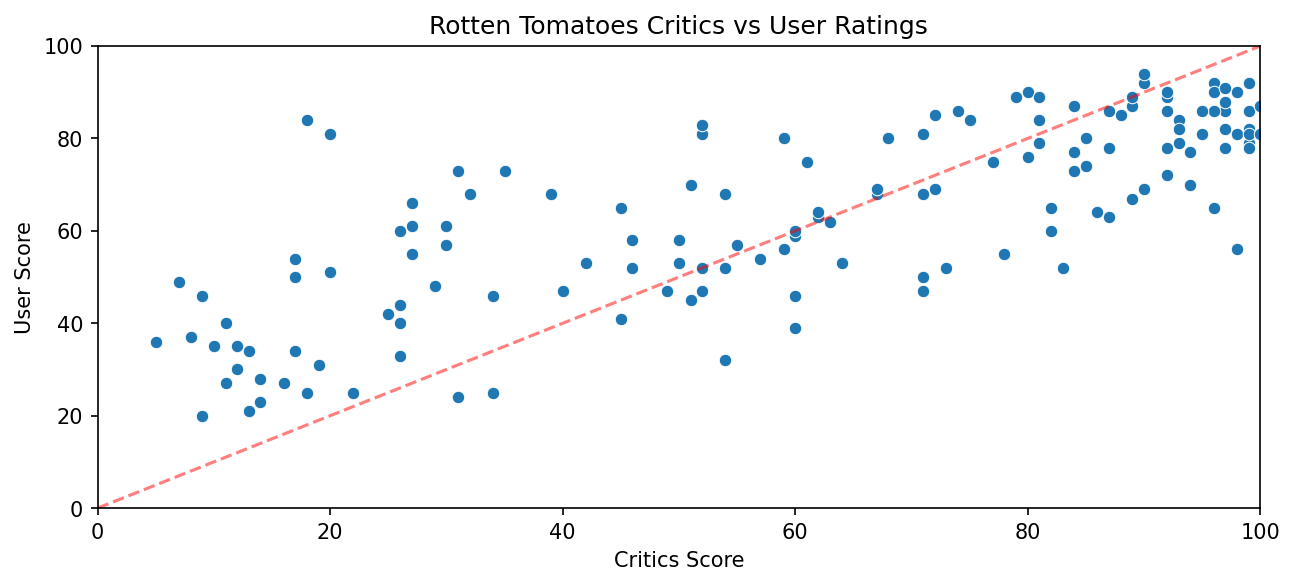

In [10]:
# Create scatter plot for RT Critics vs Users
plt.figure(figsize=(10,4),dpi=150)
sns.scatterplot(data=all_sites, x='RottenTomatoes', y='RottenTomatoes_User')
plt.plot([0, 100], [0, 100], 'r--', alpha=0.5)  # Perfect agreement line
plt.title('Rotten Tomatoes Critics vs User Ratings')
plt.xlabel('Critics Score')
plt.ylabel('User Score')
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.show()

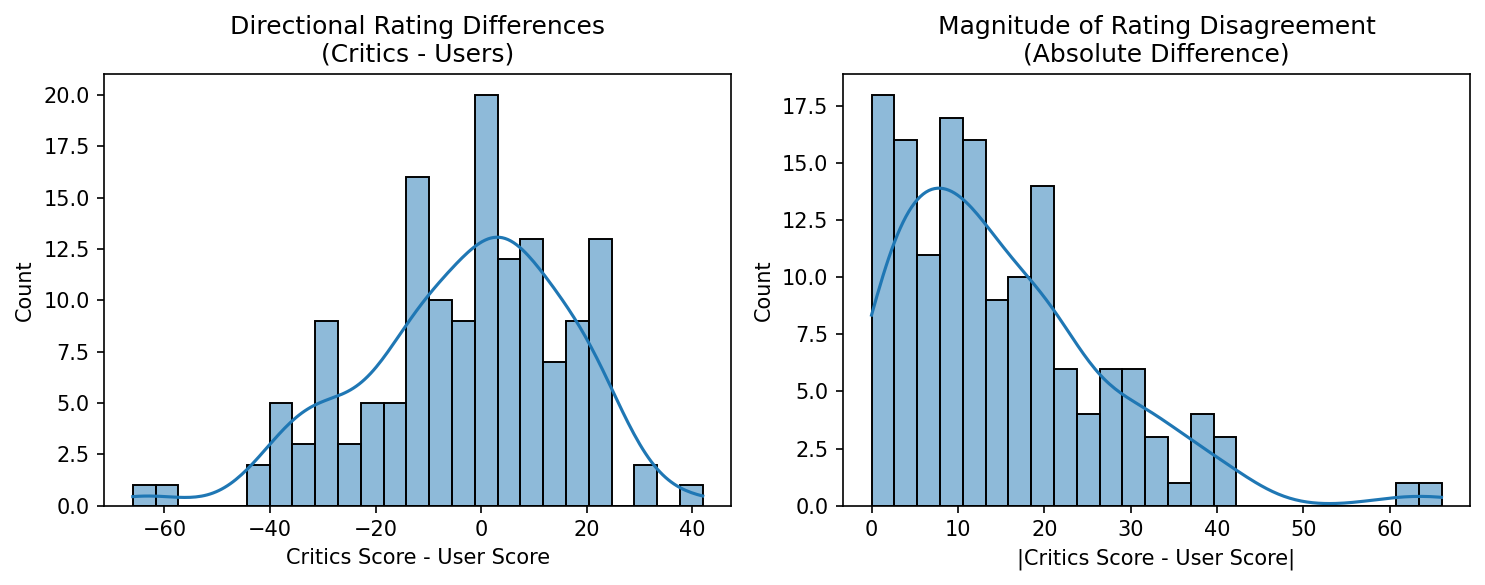


Rating Difference Statistics:
Mean Directional Difference: -3.03
Mean Absolute Difference: 15.10
Median Absolute Difference: 12.00


In [11]:
# Calculate and analyze RT rating differences
all_sites['Rotten_Diff'] = all_sites['RottenTomatoes'] - all_sites['RottenTomatoes_User']

# Visualize RT rating differences
plt.figure(figsize=(10,4),dpi=150)

# Create subplot for directional differences
plt.subplot(1, 2, 1)
sns.histplot(data=all_sites, x='Rotten_Diff', kde=True, bins=25)
plt.title('Directional Rating Differences\n(Critics - Users)')
plt.xlabel('Critics Score - User Score')
plt.ylabel('Count')

# Create subplot for absolute differences
plt.subplot(1, 2, 2)
sns.histplot(x=all_sites['Rotten_Diff'].abs(), bins=25, kde=True)
plt.title('Magnitude of Rating Disagreement\n(Absolute Difference)')
plt.xlabel('|Critics Score - User Score|')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

# Calculate and display summary statistics
mean_diff = all_sites['Rotten_Diff'].mean()
mean_abs_diff = all_sites['Rotten_Diff'].abs().mean()
median_abs_diff = all_sites['Rotten_Diff'].abs().median()

print("\nRating Difference Statistics:")
print(f"Mean Directional Difference: {mean_diff:.2f}")
print(f"Mean Absolute Difference: {mean_abs_diff:.2f}")
print(f"Median Absolute Difference: {median_abs_diff:.2f}")

In [12]:
# Display movies with largest critic-user disagreement
print("\nMovies Critics Loved but Users Hated:")
display(all_sites.nlargest(5, 'Rotten_Diff')[['FILM', 'RottenTomatoes', 'RottenTomatoes_User', 'Rotten_Diff']])

print("\nMovies Users Loved but Critics Hated:")
display(all_sites.nsmallest(5, 'Rotten_Diff')[['FILM', 'RottenTomatoes', 'RottenTomatoes_User', 'Rotten_Diff']])


Movies Critics Loved but Users Hated:


,FILM,RottenTomatoes,RottenTomatoes_User,Rotten_Diff
69,Mr. Turner (2014),98,56,42
112,It Follows (2015),96,65,31
115,While We're Young (2015),83,52,31
37,Welcome to Me (2015),71,47,24
40,I'll See You In My Dreams (2015),94,70,24



Movies Users Loved but Critics Hated:


,FILM,RottenTomatoes,RottenTomatoes_User,Rotten_Diff
3,Do You Believe? (2015),18,84,-66
85,Little Boy (2015),20,81,-61
105,Hitman: Agent 47 (2015),7,49,-42
134,The Longest Ride (2015),31,73,-42
125,The Wedding Ringer (2015),27,66,-39


## Metacritic Analysis
Examining the relationship between Metacritic critic scores and user ratings.
This provides another perspective on critic-user rating dynamics.

<Figure size 1500x600 with 0 Axes>

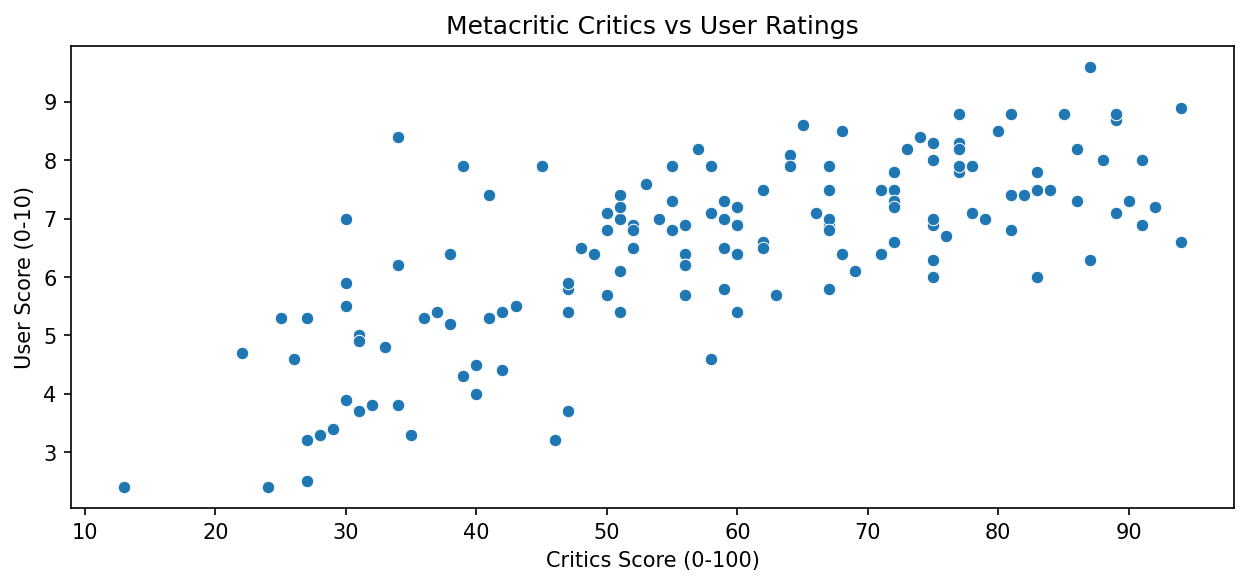

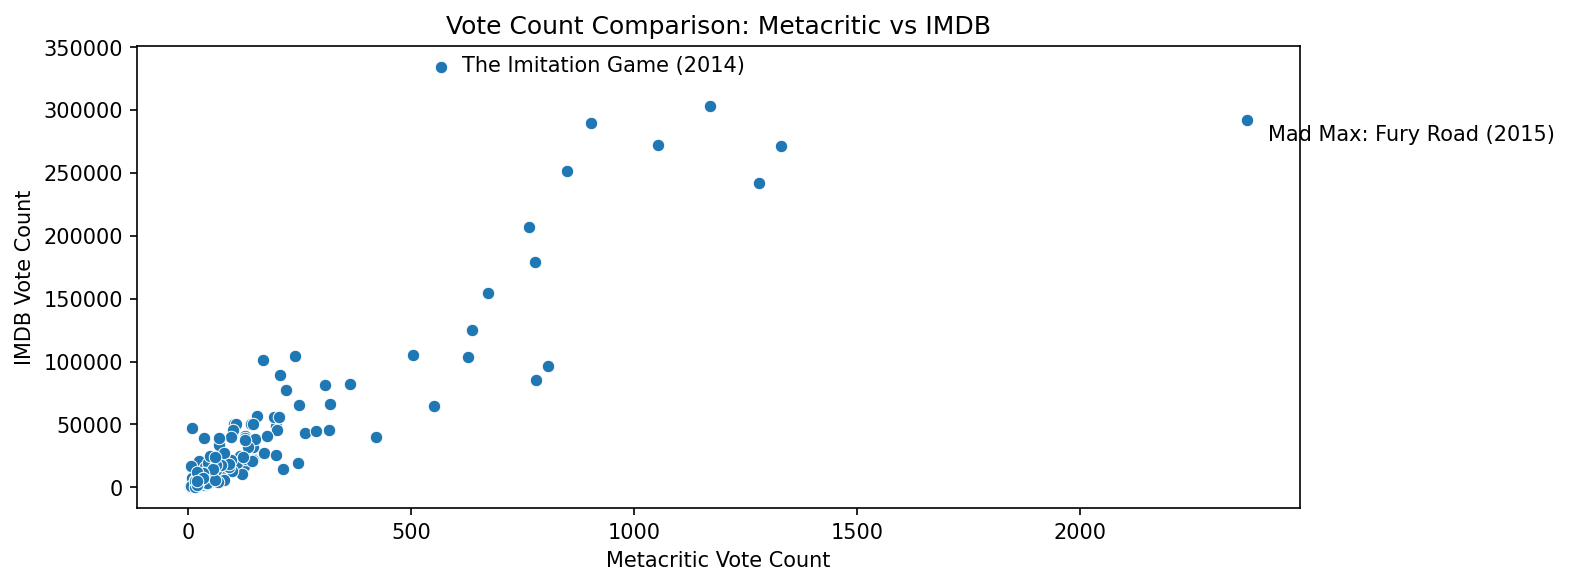


Outlier Analysis:
--------------------------------------------------

Movie with highest IMDB vote count:


,FILM,IMDB_user_vote_count,Metacritic_user_vote_count
14,The Imitation Game (2014),334164,566



Movie with highest Metacritic vote count:


,FILM,Metacritic_user_vote_count,IMDB_user_vote_count
88,Mad Max: Fury Road (2015),2375,292023


In [13]:
# Create scatter plot for Metacritic Critics vs Users
plt.figure(figsize=(10,4),dpi=150)
plt.figure(figsize=(10,4),dpi=150)
sns.scatterplot(data=all_sites, x='Metacritic', y='Metacritic_User')
plt.title('Metacritic Critics vs User Ratings')
plt.xlabel('Critics Score (0-100)')
plt.ylabel('User Score (0-10)')
plt.show()

print('\n\n')

# Analyze vote distribution
plt.figure(figsize=(10,4),dpi=150)
sns.scatterplot(data=all_sites, x='Metacritic_user_vote_count', y='IMDB_user_vote_count')
plt.title('Vote Count Comparison: Metacritic vs IMDB')
plt.xlabel('Metacritic Vote Count')
plt.ylabel('IMDB Vote Count')

# Annotate outlier points
for idx, row in all_sites.nlargest(1, 'IMDB_user_vote_count').iterrows():
    plt.annotate(row['FILM'], (row['Metacritic_user_vote_count'], row['IMDB_user_vote_count']), xytext=(10, -2), textcoords='offset points')
    
for idx, row in all_sites.nlargest(1, 'Metacritic_user_vote_count').iterrows():
    plt.annotate(row['FILM'], (row['Metacritic_user_vote_count'], row['IMDB_user_vote_count']), xytext=(10, -10), textcoords='offset points')
    
plt.show()

# Analyze outliers in voting patterns
print("\nOutlier Analysis:")
print("-" * 50)
print("\nMovie with highest IMDB vote count:")
display(all_sites.nlargest(1, 'IMDB_user_vote_count')[['FILM', 'IMDB_user_vote_count', 'Metacritic_user_vote_count']])

print("\nMovie with highest Metacritic vote count:")
display(all_sites.nlargest(1, 'Metacritic_user_vote_count')[['FILM', 'Metacritic_user_vote_count', 'IMDB_user_vote_count']])

## Cross-Platform Rating Normalization
To make fair comparisons across platforms, we need to normalize all ratings to a 0-5 scale (matching Fandango's scale).
This involves:
- Converting Rotten Tomatoes (0-100) to 0-5 scale
- Converting Metacritic (0-100) to 0-5 scale
- Converting IMDB (0-10) to 0-5 scale

In [14]:
# Merge Fandango and All Sites data
df = pd.merge(fandango, all_sites, on='FILM', how='inner')

# Normalize ratings to 0-5 scale
normalized_ratings = pd.DataFrame()

# Fandango ratings (already 0-5)
normalized_ratings['Fandango_Stars'] = df['STARS']
normalized_ratings['Fandango_Rating'] = df['RATING']

# Rotten Tomatoes (0-100 to 0-5)
normalized_ratings['RT_Critic'] = round(df['RottenTomatoes'] / 20, 1)
normalized_ratings['RT_User'] = round(df['RottenTomatoes_User'] / 20, 1)

# Metacritic (0-100 to 0-5)
normalized_ratings['Metacritic_Critic'] = round(df['Metacritic'] / 20, 1)
normalized_ratings['Metacritic_User'] = round(df['Metacritic_User'] / 2, 1)

# IMDB (0-10 to 0-5)
normalized_ratings['IMDB'] = round(df['IMDB'] / 2, 1)

# Display first few rows and summary statistics
print("Normalized Ratings Overview:")
display(normalized_ratings.head())
print("\nSummary Statistics:")
display(normalized_ratings.describe())

Normalized Ratings Overview:


,Fandango_Stars,Fandango_Rating,RT_Critic,RT_User,Metacritic_Critic,Metacritic_User,IMDB
0,4.0,3.9,1.2,2.1,2.3,1.6,2.1
1,4.5,4.5,3.6,4.0,3.0,3.5,3.6
2,5.0,4.8,3.6,4.2,3.6,3.3,3.7
3,5.0,4.8,4.0,4.2,3.4,3.4,3.7
4,4.5,4.5,4.9,4.5,4.7,4.4,4.3



Summary Statistics:


,Fandango_Stars,Fandango_Rating,RT_Critic,RT_User,Metacritic_Critic,Metacritic_User,IMDB
count,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000
mean,4.086207,3.841379,3.033103,3.180690,2.942759,3.253793,3.369655
std,0.541169,0.502437,1.509095,0.996542,0.977365,0.763128,0.477744
min,3.000000,2.700000,0.200000,1.000000,0.600000,1.200000,2.000000
25%,3.500000,3.500000,1.600000,2.500000,2.200000,2.800000,3.200000
50%,4.000000,3.900000,3.200000,3.300000,3.000000,3.400000,3.400000
75%,4.500000,4.200000,4.400000,4.000000,3.800000,3.800000,3.700000
max,5.000000,4.800000,5.000000,4.700000,4.700000,4.800000,4.300000


## Comparative Rating Analysis
Now that all ratings are on the same scale, we can directly compare rating patterns across platforms.
We'll examine:
1. Overall rating distributions
2. Platform-specific biases
3. Treatment of poorly-rated movies

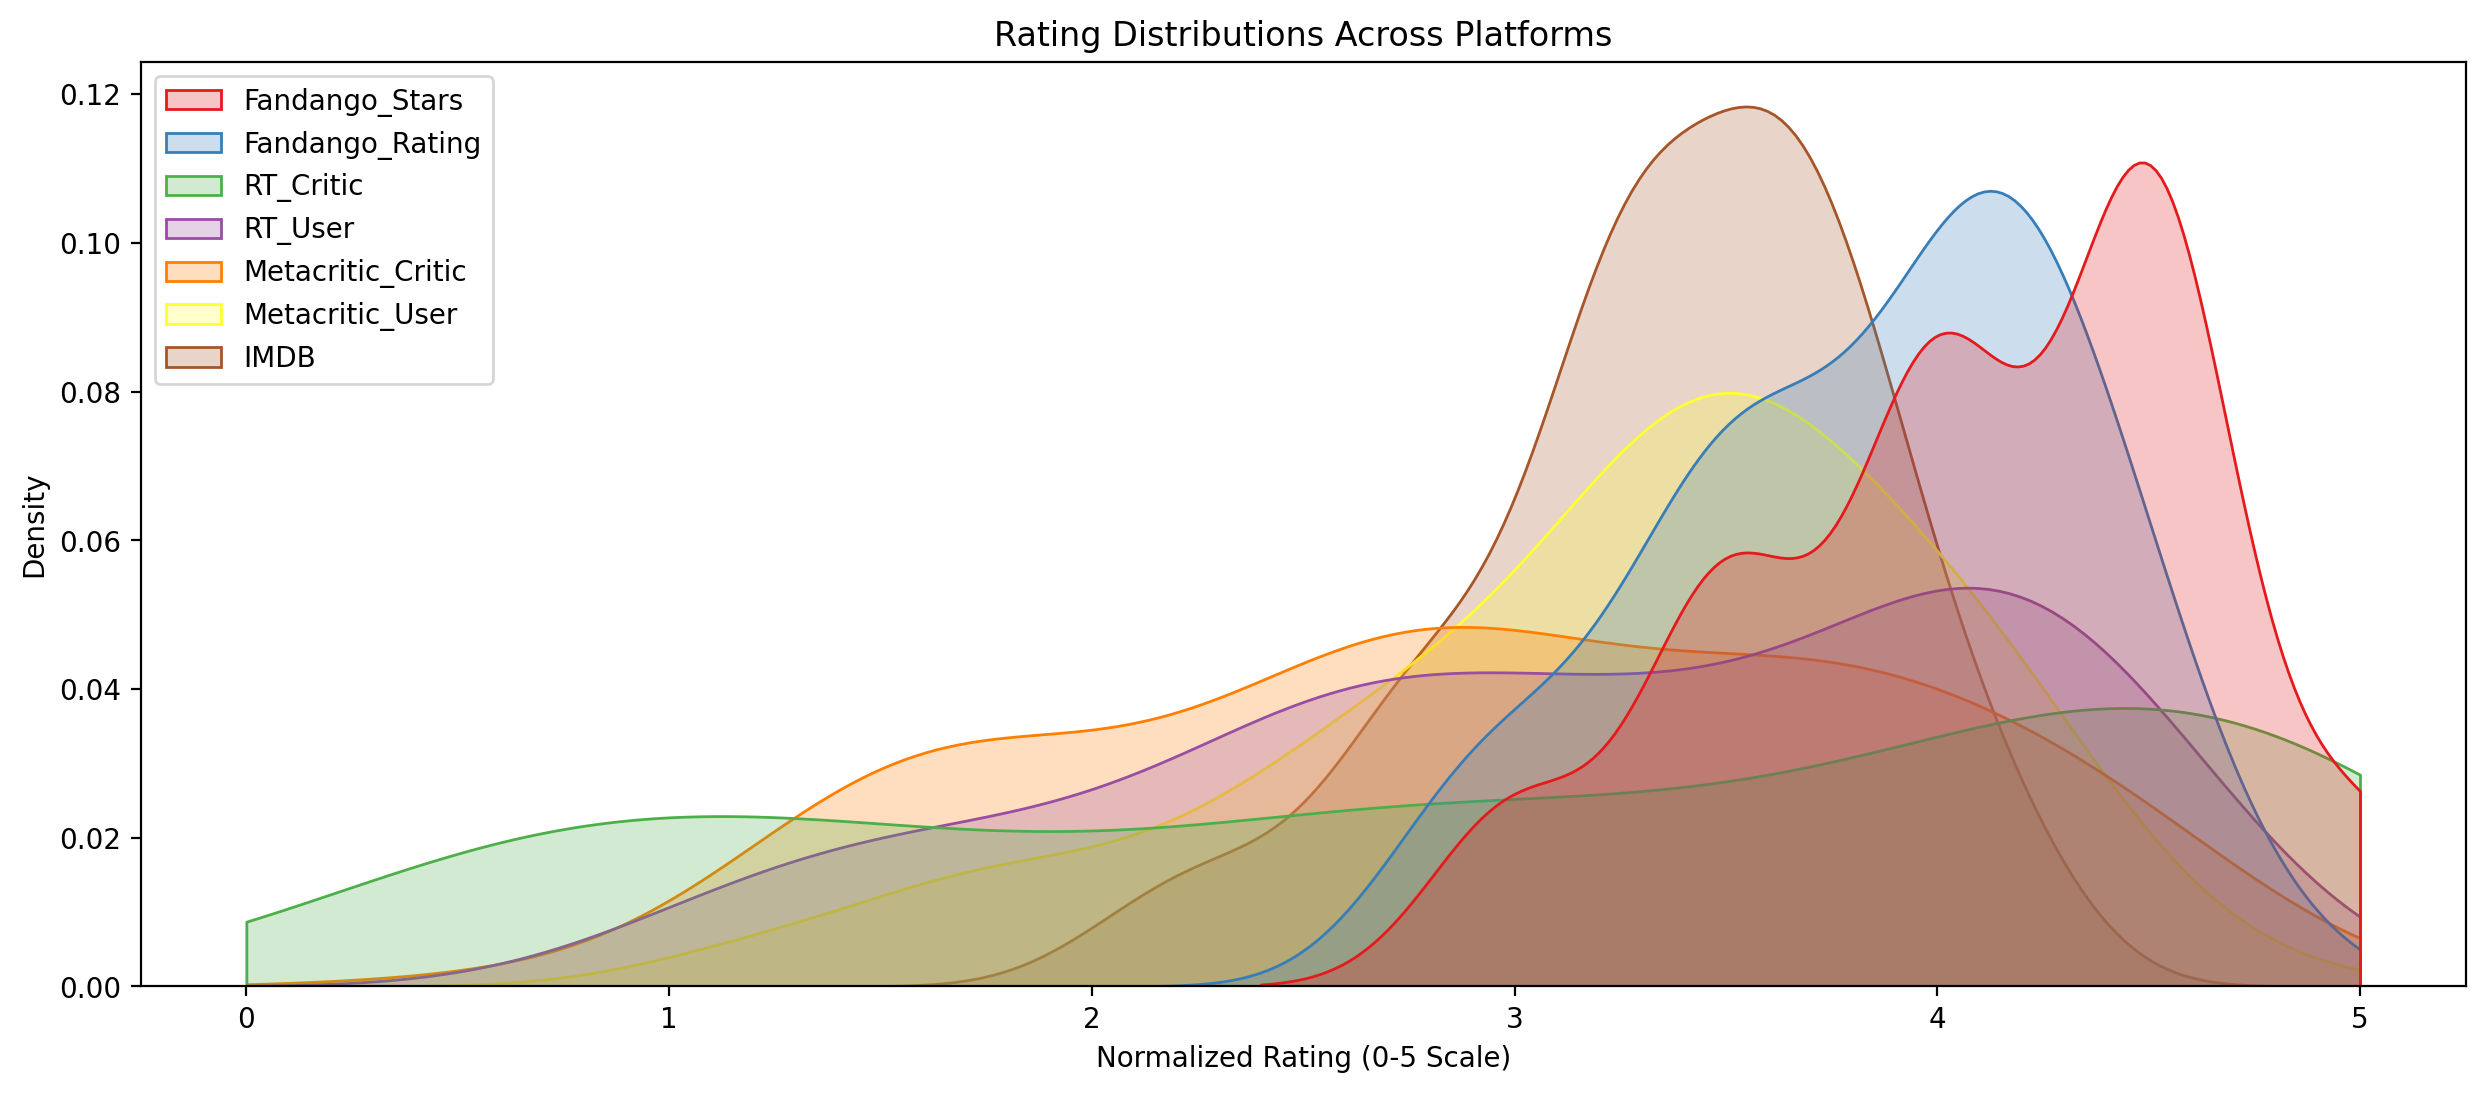

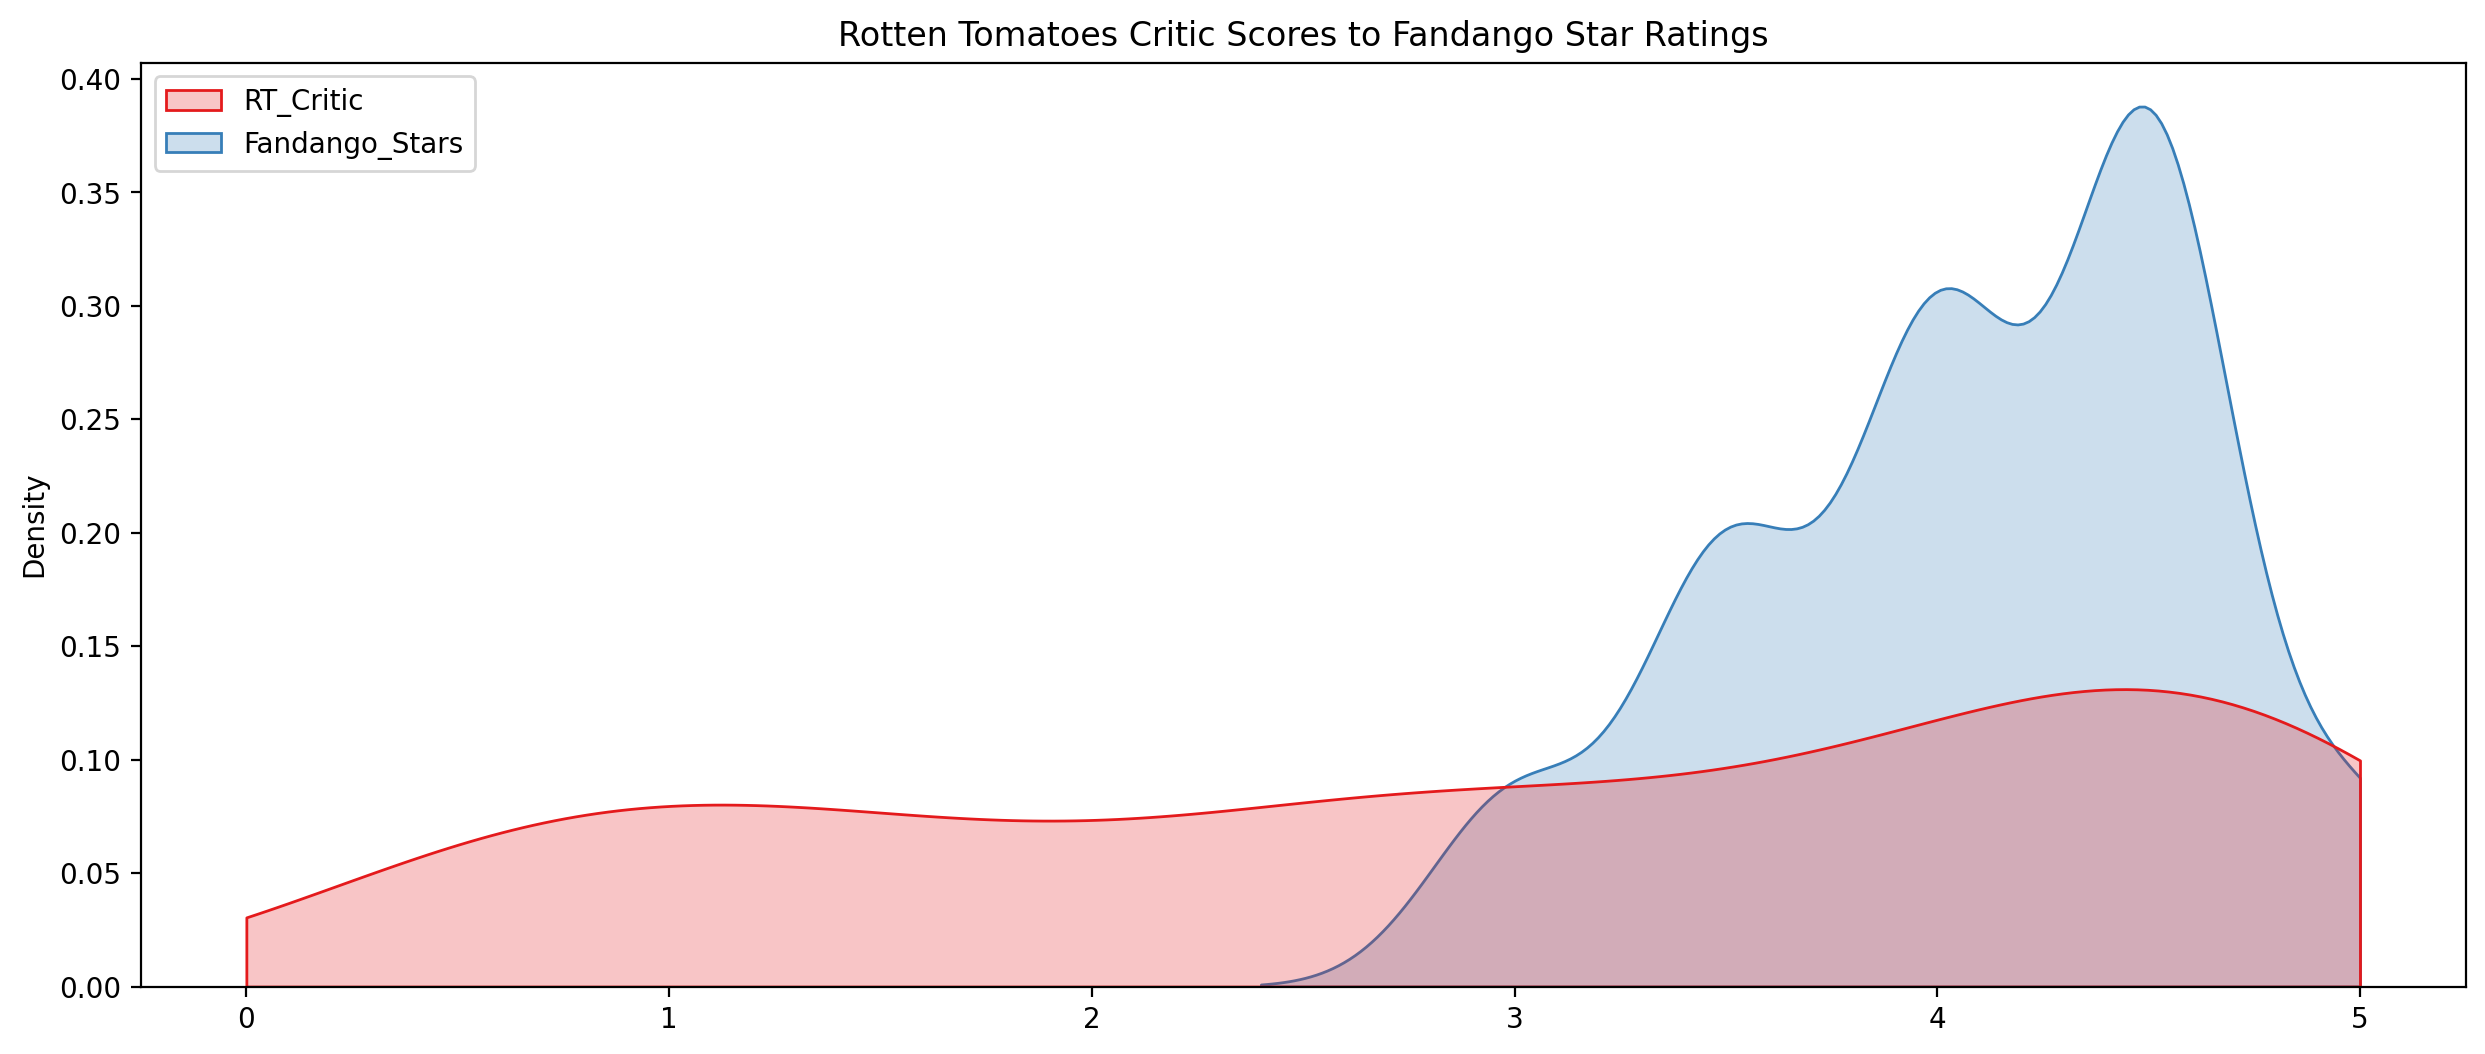


Mean Ratings by Platform:
Fandango_Stars: 4.09 ± 0.54
Fandango_Rating: 3.84 ± 0.50
IMDB: 3.37 ± 0.48
Metacritic_User: 3.25 ± 0.76
RT_User: 3.18 ± 1.00
RT_Critic: 3.03 ± 1.51
Metacritic_Critic: 2.94 ± 0.98


In [15]:
# Create distribution plot of all normalized ratings
plt.figure(figsize=(15,6),dpi=200)
sns.kdeplot(data=normalized_ratings,clip=[0,5],fill=True,palette='Set1')
    
plt.title('Rating Distributions Across Platforms')
plt.xlabel('Normalized Rating (0-5 Scale)')
plt.ylabel('Density')
plt.show()

print('\n\n')

# Create distribution plot that compare RT critic ratings against the STARS displayed by Fandango.
plt.figure(figsize=(15,6),dpi=200)
sns.kdeplot(data=normalized_ratings[['RT_Critic','Fandango_Stars']],clip=[0,5],fill=True,palette='Set1')
plt.title('Rotten Tomatoes Critic Scores to Fandango Star Ratings')
plt.show()

# Compare mean ratings across platforms
mean_ratings = normalized_ratings.mean().sort_values(ascending=False)
std_ratings = normalized_ratings.std()

print("\nMean Ratings by Platform:")
for platform in mean_ratings.index:
    print(f"{platform}: {mean_ratings[platform]:.2f} ± {std_ratings[platform]:.2f}")